# Shifting Spectra

Make sure you have apogee pointing to the right server path before running this! Sometimes the server location jumps around and tries to make you download all the data again

In [1]:
#Importing the necessary packages
import apogee.tools.read as apread
import apogee.spec.plot as splot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
Lambda = splot.apStarWavegrid()
import csv

## EqW and Plotting Function

Here are the functions I use to calculate equivalent width and plot the spectra

In [2]:
def find_nearest(array,value):
    index = (np.abs(array-value)).argmin()
    #return array[index]
    return index

In [3]:
def Brackett_EqW_Plot(loc_id, two_massid,number,left_limit,right_limit,bottom_limit,top_limit):
    spec_header = apread.apStar(loc_id, two_massid,ext=0,header=True)
    
    nvisits = spec_header[1]['NVISITS']
    n=number
    #calculate the emission line in a vacuum
    vhelio = spec_header[1]['VHELIO']
    doppler = spec_header[1]['VRAD1']
    bc1 = spec_header[1]['BC1']
    
    
    if nvisits == 1:
        spec1 = apread.apStar(loc_id, two_massid,ext=1,header=False)
    else:
        spec1 = apread.apStar(loc_id, two_massid,ext=1,header=False)[3]

    c = 299792
    rydberg = 1.0973731568539*(10**7)
    electron = 9.10938356*(10**-31)
    nucleus = 1.672621898*(10**-27)
    fracryd = rydberg/(1+(electron/nucleus))
    vacuum = fracryd*((1./16.)-(1./(float(n**2))))
    lambda_obs = 1/vacuum
    #calculated_point1 = lambda_obs*((1-(vhelio/c))/(1-(doppler/c)))
    #calculated_point1 = lambda_obs*(1-(bc1/c))
    #calculated_point1 = lambda_obs*(1-(vhelio/c))
    calculated_point1 = lambda_obs*(1-((vhelio)/c))
    diff2 = (lambda_obs-calculated_point1)*(10**10)
    calculated_point2 = calculated_point1*(10**10)
    
    
    
    centerline = find_nearest((Lambda+diff2),(lambda_obs*(10**10)))
    
    
        
    L1 = centerline - 135
    L2 = centerline - 90
    R1 = centerline + 90
    R2 = centerline + 135
    Lwindow = centerline - 160
    Rwindow = centerline + 160
    
    #Calculate Fc
    lsum= np.sum(spec1[L1:L2])/ len(spec1[L1:L2])
    rsum = np.sum(spec1[R1:R2])/len(spec1[R1:R2])
    Fc= (lsum+rsum)/2
    
    #Calculate Equivalent Width
    EqW=0
    for i in range(L2,R1):
        summ=(Fc*(Lambda[i+1]-Lambda[i]))-((1./2.)*(Lambda[i+1]-Lambda[i])*(spec1[i+1]+spec1[i]))
        EqW = EqW + summ
    EqW = abs(EqW/Fc)
    upper = Lambda[centerline]+(EqW/2)
    lower = Lambda[centerline]-(EqW/2)
    
    #Plot averaged spectrum with EqW
    fig,ax = plt.subplots(figsize=(16,8))
    plt.plot((Lambda+diff2),spec1,linewidth=2.5,label='Shifted')
    plt.plot(Lambda,spec1,linewidth=2.5,label='Unshifted')
    plt.axhline(y=Fc,ls='dashed',color='black')
    plt.axvline(x=Lambda[centerline]+diff2,ls='dashed',color='r',label='Vacuum Emission')
    plt.legend()
    plt.xlabel('Wavelength'+' '+'('+ r'$\AA$'+')', fontsize=24)
    plt.ylabel('Flux (erg s' + r'$^{-1}$'+' cm'+r'$^{-2}$' + r'$\AA^{-1}$'+')', fontsize=24)
    plt.xlim(left_limit,right_limit)
    plt.ylim(bottom_limit,top_limit)
    
    ax.tick_params(axis='both', labelsize=20)

   

## Unshifted Plot

Below is the whole spectra plotted unshifted. Don't worry about the lines that go to zero; python isn't breaking there is just no recorded data there and I haven't told python not to plot them yet.

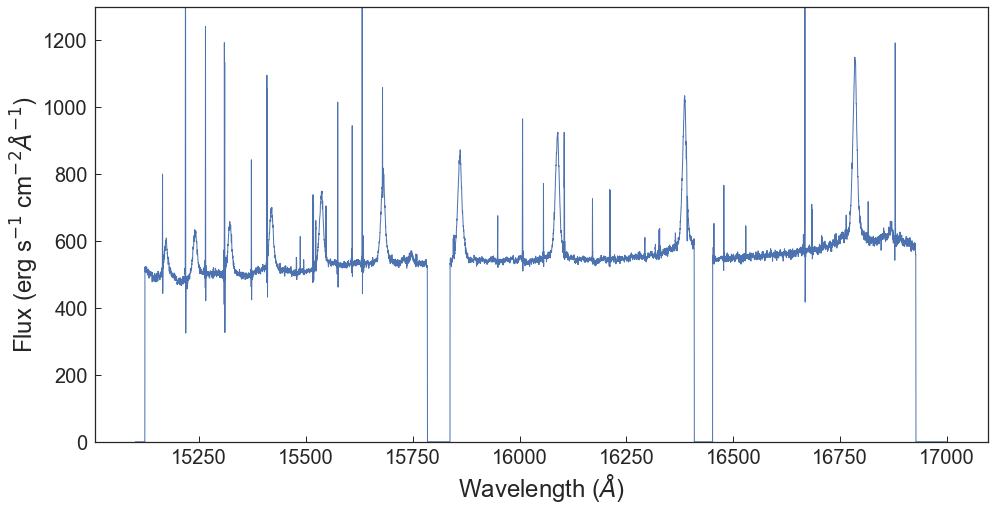

In [6]:
loc_id = 4586
two_massid='2M03434449+3143092'
spectest1 = apread.apStar(loc_id,two_massid,ext=1,header=False)[3]
fig,ax = plt.subplots(figsize=(16,8))
plt.plot(Lambda,spectest1,linewidth=1)
ax.tick_params(axis='both', labelsize=20)
plt.xlabel('Wavelength'+' '+'('+ r'$\AA$'+')', fontsize=24)
plt.ylabel('Flux (erg s' + r'$^{-1}$'+' cm'+r'$^{-2}$' + r'$\AA^{-1}$'+')', fontsize=24)
plt.ylim(0,1300);

## Applying Velocity Shift

First, we start out by getting some info from the header

## Calcuating EqW

## Shifted Spectra Examples

Below are several examples of good emission lines with both their unshifted and shifted spectra plotted.

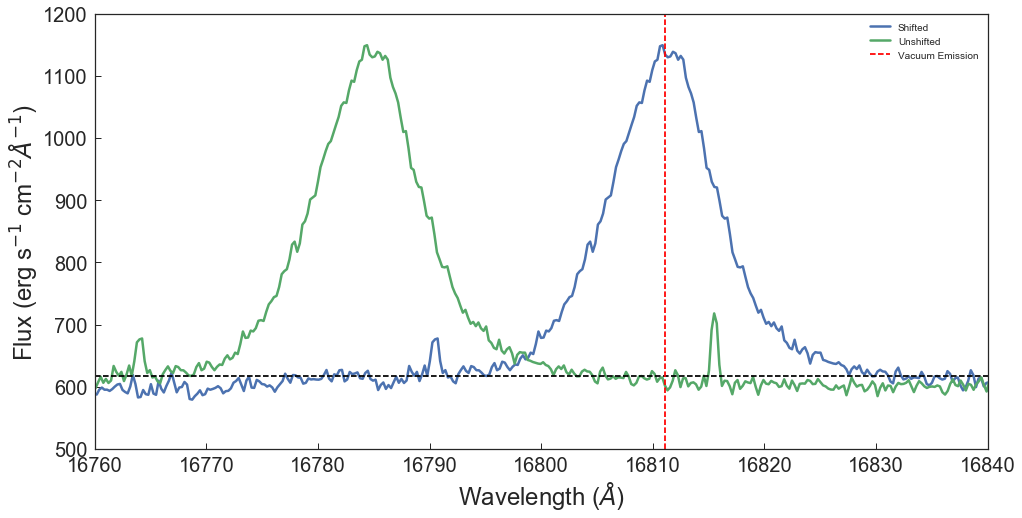

In [86]:
Brackett_EqW_Plot(4586,'2M03434449+3143092',11,16760,16840,500,1200)

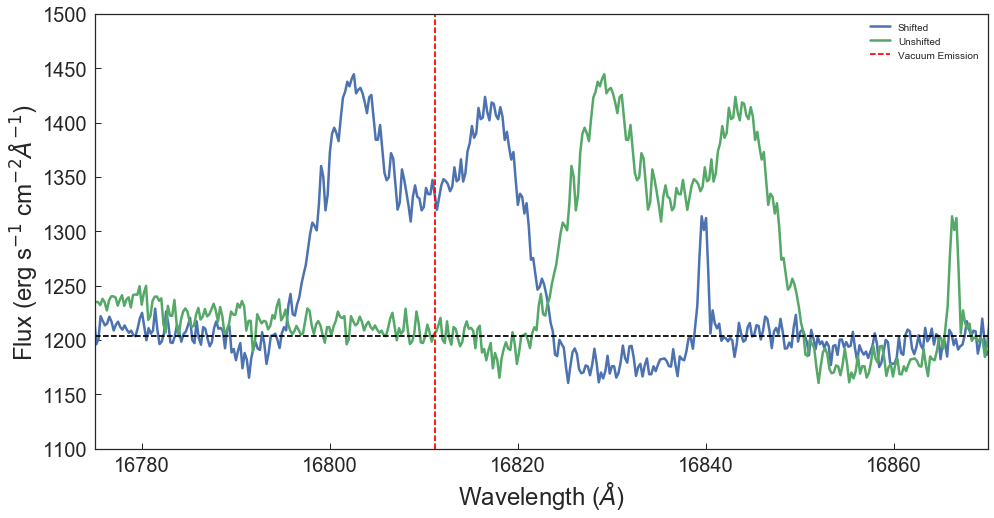

In [87]:
Brackett_EqW_Plot(4593,'2M05361555+3257145',11,16775,16870,1100,1500)

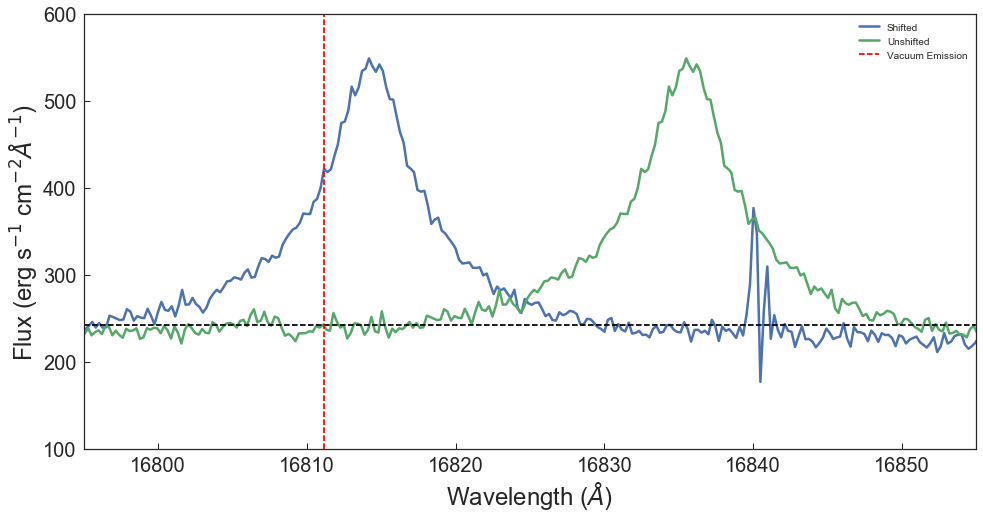

In [88]:
Brackett_EqW_Plot(4617,'2M06450343-0034140',11,16795,16855,100,600)

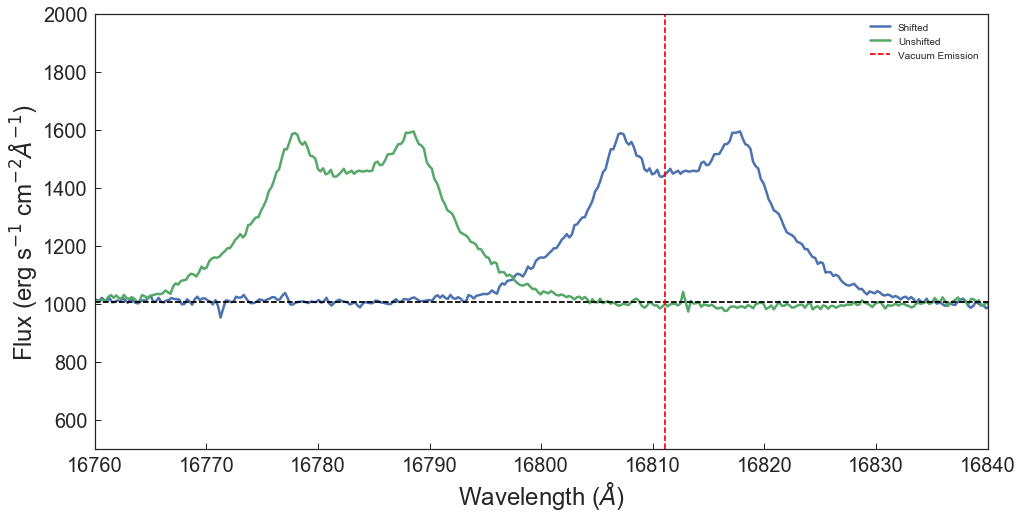

In [89]:
Brackett_EqW_Plot(4380,'2M18194176-1058093',11,16760,16840,500,2000)

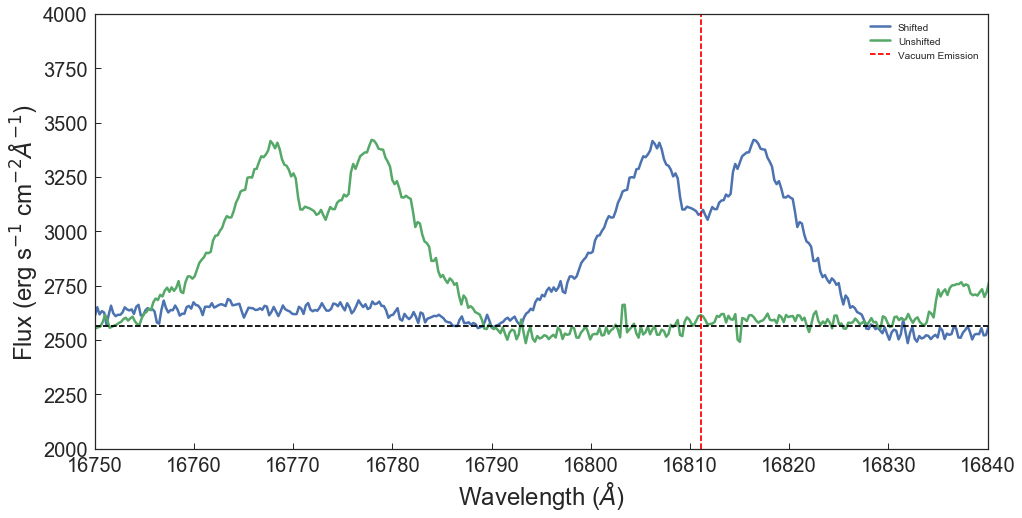

In [90]:
Brackett_EqW_Plot(4581,'2M06525305-1000270',11,16750,16840,2000,4000)

In [97]:
spectest2 = apread.apStar(4593,'2M05361555+3257145',ext=0,header=True)
spectest2

(None, 
 SIMPLE  =                    T /image conforms to FITS standard
 BITPIX  =                   16 /bits per data value
 NAXIS   =                    0 /number of axes
 EXTEND  =                    T /file may contain extensions
 DATE    = '2016-01-26'         / Creation UTC (CCCC-MM-DD) date of FITS header
 COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy
 COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H
 OBJID   = '2M05361555+3257145' / Object ID
 J       =              9.78100 / 2MASS J magnitude
 H       =              9.79000 / 2MASS H magnitude
 K       =              9.76600 / 2MASS Ks magnitude
 TARG1   =          -2147483584 / First APOGEE targeting flag (bitwise, see docs)
 TARG2   =          -2147483136 / Second APOGEE targeting flag (bitwise, see docs
 TARG3   =                    0 / Third APOGEE targeting flag (bitwise, see docs)
 SURVEY  = 'apogee  '           / Survey name (for targeting flags)
 TELESCOP= '

Plate ID,2M ID,Vhelio,Vrad,SVhelio
4617,2M06450343-0034140,-380.154,0,449.349
4586,2M03434449+3143092,472.223,0,-354.991
4593,2M05361555+3257145,-475.114,0,358.542


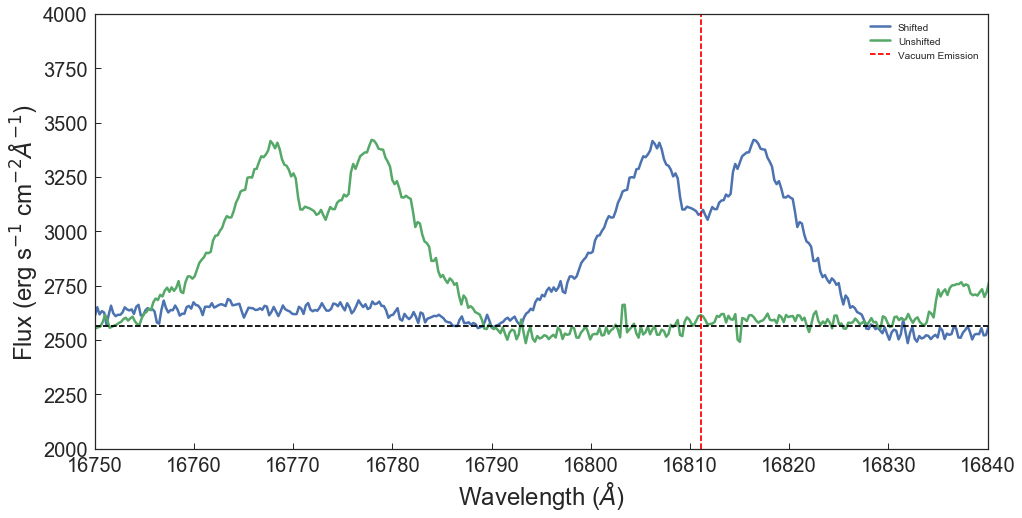

In [7]:
from IPython.display import HTML, display


data = [['Plate ID','2M ID','Vhelio','Vrad','SVhelio'],
         [4617,'2M06450343-0034140',-380.154,0,449.349],
         [4586,'2M03434449+3143092',472.223,0,-354.991],
         [4593,'2M05361555+3257145',-475.114,0,358.542]]

display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join('<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data))))
Brackett_EqW_Plot(4581,'2M06525305-1000270',11,16750,16840,2000,4000)

In [1]:
def blah():
    al;ksdjfa